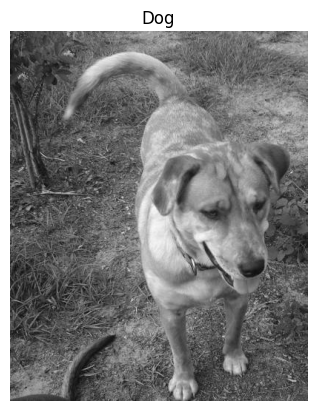

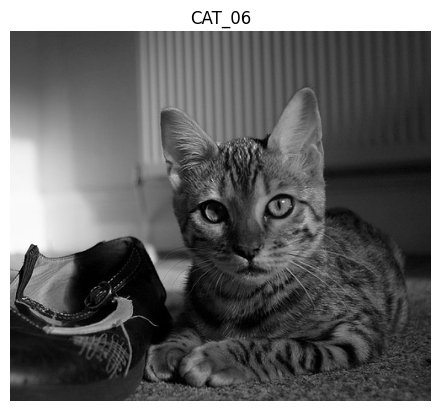

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
DATADIR = "/home/nigga/engine/data/cats"
Categories = ['Dog','CAT_06']
for category in Categories:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        file_path = os.path.join(path, img)
        try:
            img_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img_array is None:
                print("Skipping unreadable image:", file_path)
                continue
            plt.imshow(img_array, cmap='gray')
            plt.title(category)
            plt.axis('off')
            plt.show()
            break
        except Exception as e:
            print("Error reading image:", file_path, "|", e)

In [11]:
print(img_array)

[[64 64 64 ... 46 49 50]
 [64 65 65 ... 46 50 51]
 [64 65 66 ... 48 51 52]
 ...
 [36 37 38 ... 61 59 55]
 [35 35 36 ... 60 55 47]
 [35 35 36 ... 65 59 49]]


In [12]:
Img_size = 80
new_array = cv2.resize(img_array,(Img_size,Img_size))

In [13]:
new_array

array([[65, 64, 66, ..., 51, 38, 49],
       [67, 67, 66, ..., 52, 39, 47],
       [69, 69, 69, ..., 54, 40, 47],
       ...,
       [38, 41, 38, ..., 46, 43, 38],
       [36, 38, 37, ..., 54, 67, 46],
       [39, 37, 42, ..., 58, 58, 61]], shape=(80, 80), dtype=uint8)

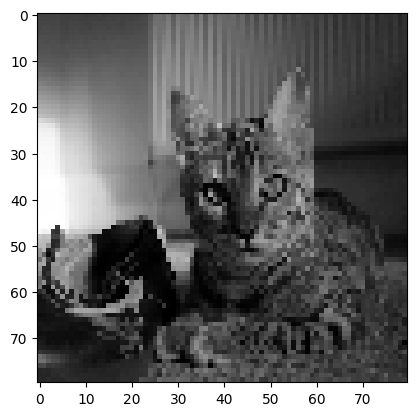

In [14]:
plt.imshow(new_array,cmap='gray')
plt.show()

In [15]:
training_data = []
def craete_training_data():
    for category in Categories:
        path = os.path.join(DATADIR,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE katred photo black and white
                new_array = cv2.resize(img_array,(Img_size,Img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
craete_training_data()

Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


In [16]:
print(len(training_data))

21868


In [17]:
import random
random.shuffle(training_data) # can randomiw dakchi bach may7eme9ch lina lmodel so ordre doesn’t bias the learning process

In [18]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
0
0
1
0
0


In [23]:
X = []
y = []

In [24]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X=  np.array(X).reshape(-1,Img_size,Img_size,1)

In [25]:
import pickle 
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [26]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

Pickle is Python’s way of serializing (saving) Python objects to a file.

.dump(obj, file) → save obj to a file

.load(file) → read it back into Python

In [21]:
import tensorflow as tf

# 1. Check if a GPU is detected
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # 2. Configure memory growth (better than a fixed fraction)
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # 3. Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        print(f"GPUs detected and configured: {gpus[0].name}")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU detected. Falling back to CPU.")

2025-12-01 01:26:49.902228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 01:26:50.676002: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 01:26:53.372543: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


GPUs detected and configured: /physical_device:GPU:0
